In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
#from pathlib import Path

#path_to_assigment_dir = Path("/content/drive/MyDrive/ML4FG")
#df = pd.read_csv(path_to_assigment_dir / "CCLE_expression.csv", index_col=0)
df = pd.read_csv("data/CCLE_expression.csv", index_col=0)

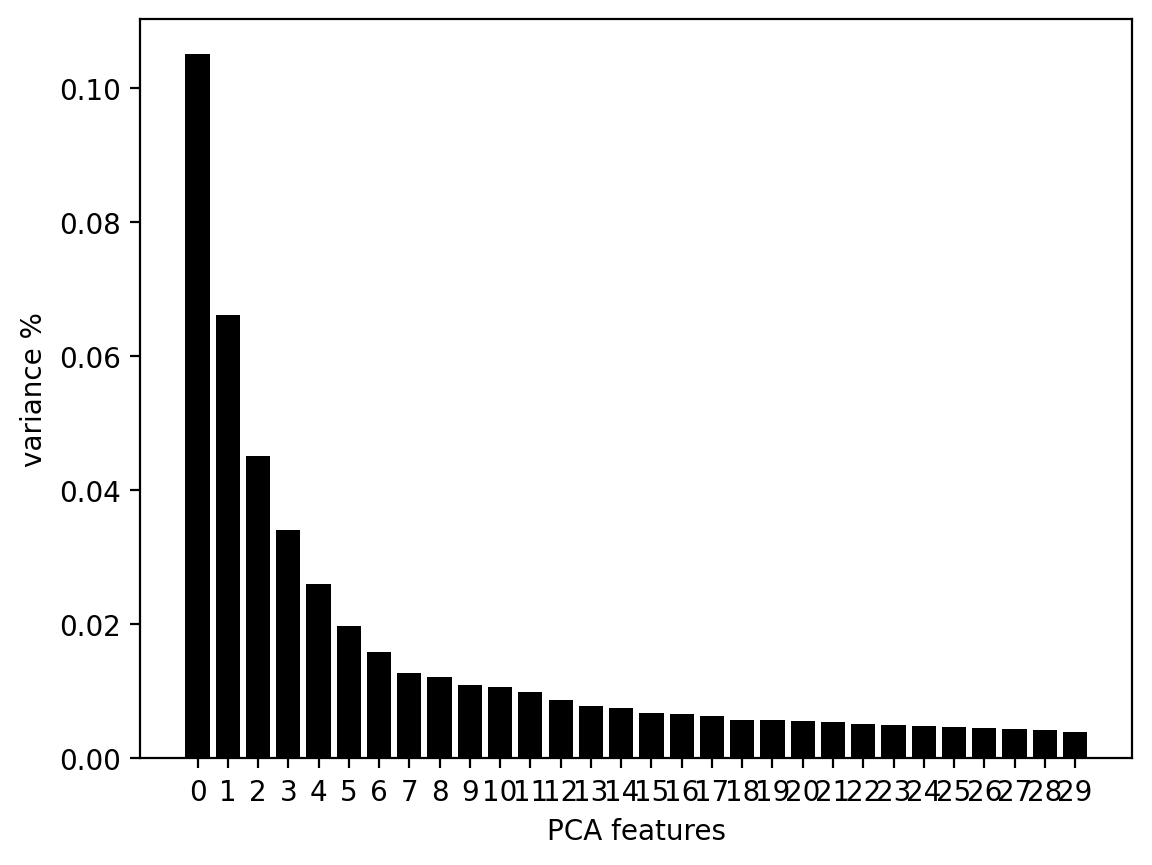

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)

# Create a PCA instance: pca
pca = PCA(n_components=30)
principalComponents = pca.fit_transform(X_std)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [16]:
PCA_components.shape

(1406, 30)

In [13]:
for i in range(10):
    print(X_std[i].std())

0.9530632233278231
1.0924346076603266
0.8473848649893522
0.8317357508628528
0.9406631801335755
0.940348088305088
1.2453027133280812
1.0751552471182917
0.8032428588960675
0.8467208112057044


Text(0, 0.5, 'PCA 2')

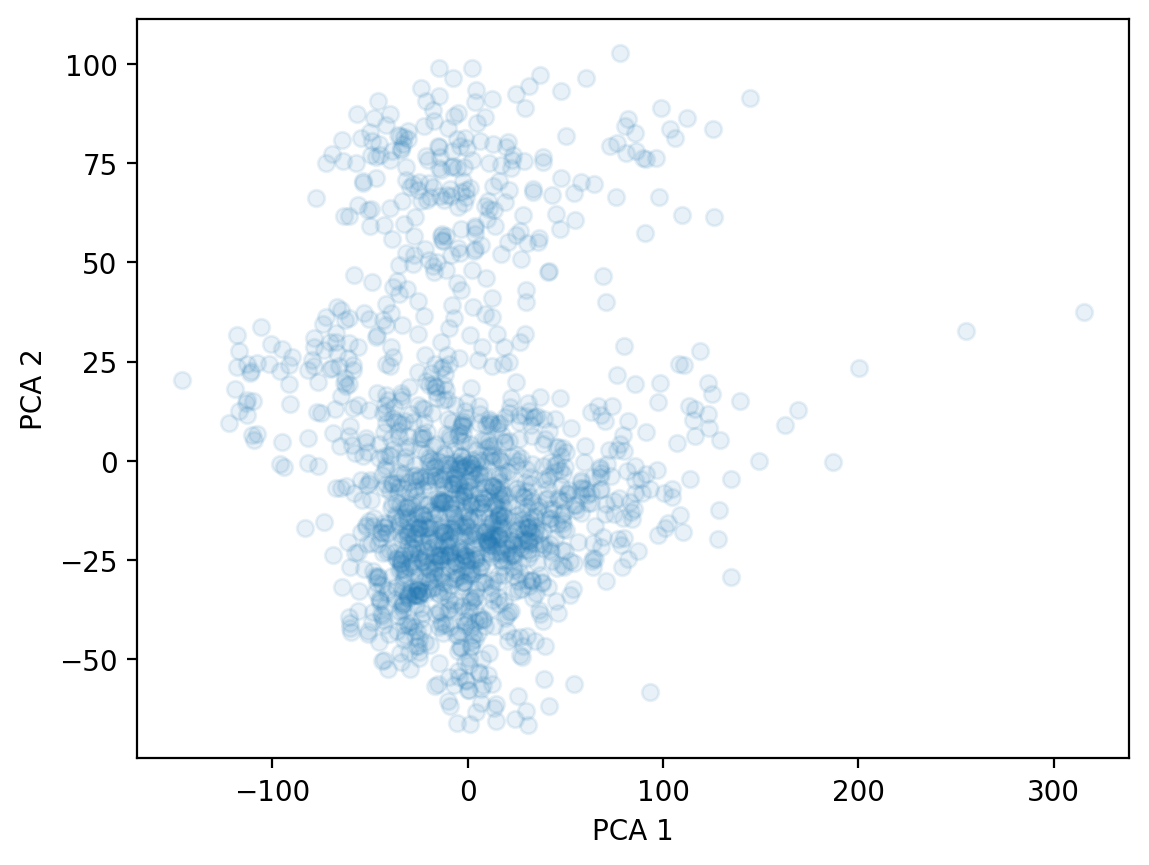

In [5]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

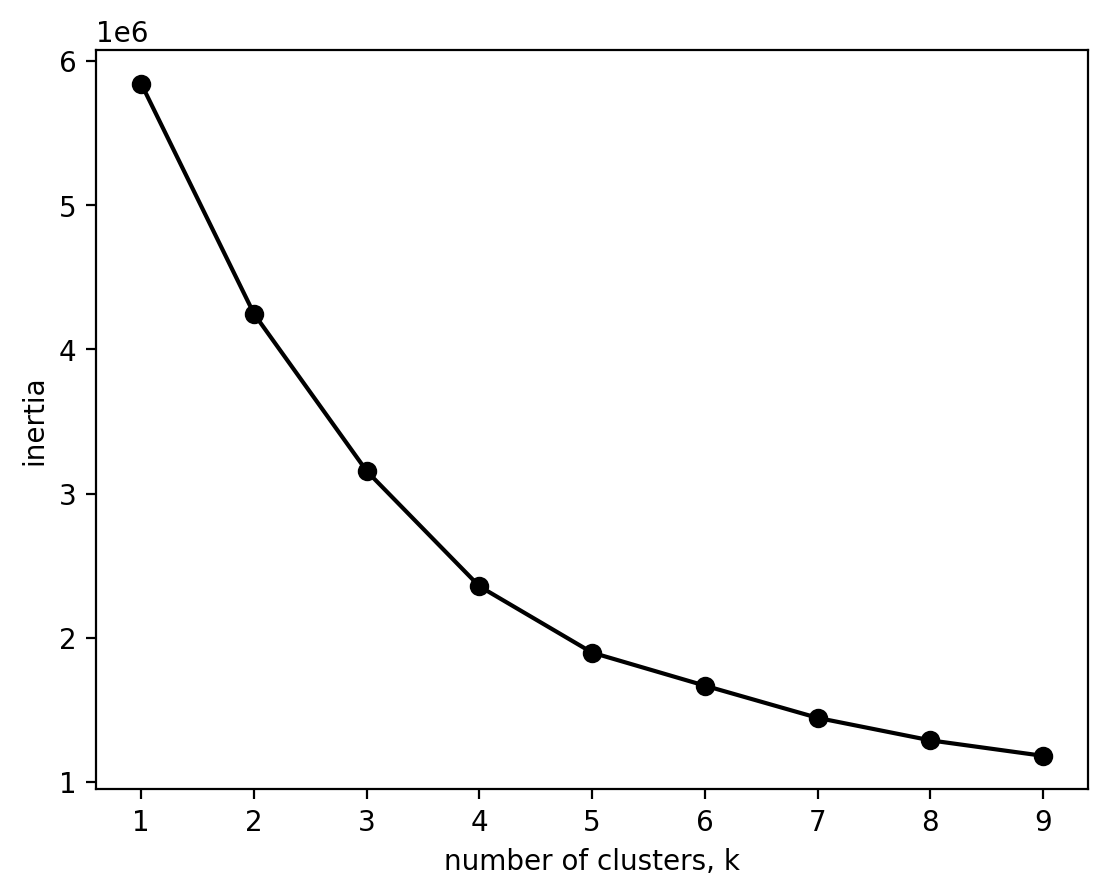

In [17]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

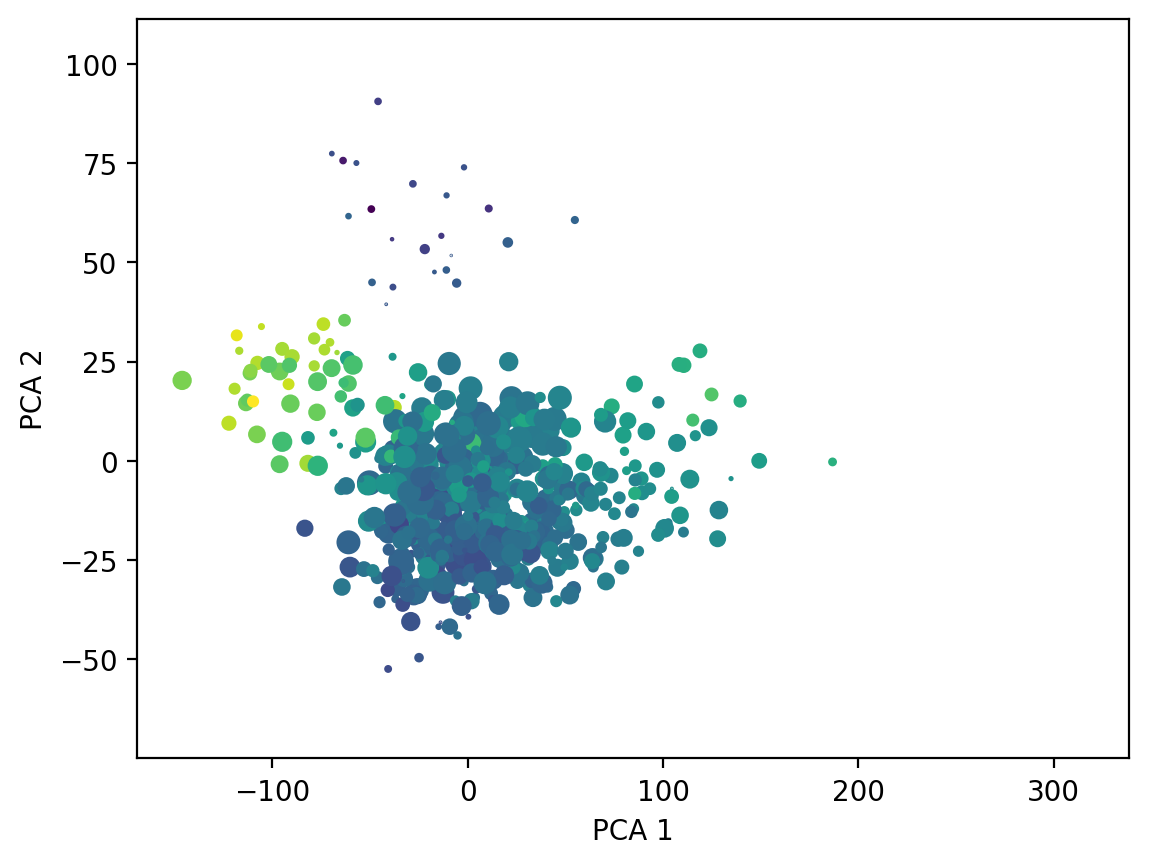

In [27]:
plt.scatter(PCA_components[0], PCA_components[1], PCA_components[2], PCA_components[3])
#, PCA_components[2], PCA_components[3], alpha=.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [28]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(PCA_components[0], PCA_components[1], PCA_components[2],s=4)
plt.show()

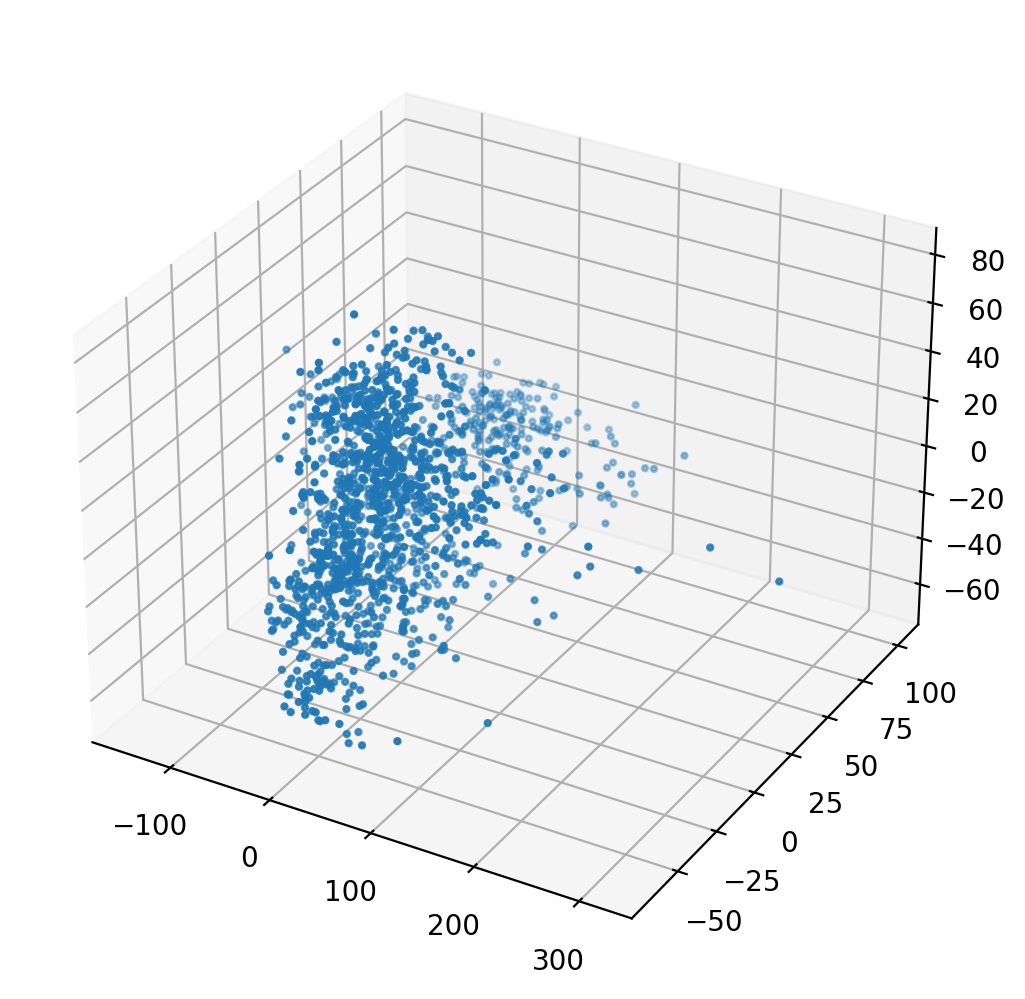

In [34]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(PCA_components[0], PCA_components[1], PCA_components[2],s=4)
plt.show()